In [4]:
#!pip install pandas

In [5]:
#Basic libraries
import pandas as pd
import numpy as np

In [7]:
#!pip install matplotlib

In [14]:
# visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

In [9]:
#!pip install pydot

In [12]:
#pip install seaborn

In [15]:
#!pip install scikit-learn

In [16]:
#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [17]:
#Deep Learning library
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.layers.core import Dense,Activation,Dropout
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils.np_utils import to_categorical
from keras.wrappers.scikit_learn import KerasClassifier

In [18]:
#Digit MNIST dataset
(x_train_digit, y_train_digit), (x_test_digit, y_test_digit) = mnist.load_data()

11490434/11490434 [==============================] - 1793s 156us/step


In [19]:
x_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [20]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

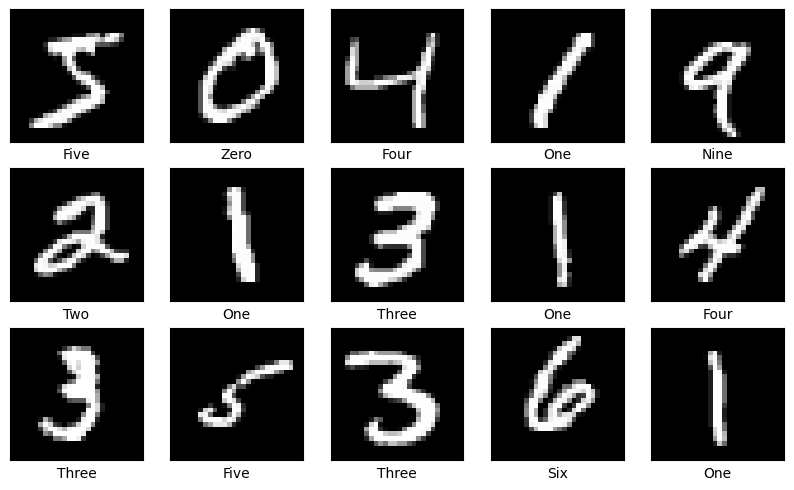

In [23]:
#Names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#Visualizing the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train_digit[i], cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

#### INPUT PREPROCESSING

In [24]:
#total 1lk,for training 60k,test 40k
x_train_digit.shape 
(count,rows,columns)

(60000, 28, 28)

In [25]:
#converting 3D to 2D by using reshape
#28 * 28 =784
x_train_digit = x_train_digit.reshape(60000, 784)
x_test_digit = x_test_digit.reshape(10000, 784)

In [26]:
x_train_digit.shape

(60000, 784)

#### OUTPUT PREPROCESSING

In [28]:
y_test_digit

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [29]:
y_test_digit.shape

(10000,)

In [31]:
#Encoding Digit MNIST Labels
y_train_digit = to_categorical(y_train_digit, num_classes=10)
y_test_digit = to_categorical(y_test_digit, num_classes=10)

In [32]:
y_train_digit

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [34]:
y_train_digit[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [35]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [36]:
#Creating base neural network
model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(784,)),
    #layers.Dropout(0.3),
    #layers.BatchNormalization(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

### FORMULA FOR PARAMETER CALCULATION IN ANN
###  param_number = output channel * (input channel number + 1)
#### (256*(784 + 1)) = 200960
#### (64*(256 + 1))  = 16448
#### (64*(64 + 1))   =4160
#### (10*(64 + 1))   =650

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 222,218
Trainable params: 222,218
Non-trainable params: 0
_________________________________________________________________


In [38]:
#Compiling the model
model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics = ["accuracy"])

In [39]:
history=model.fit(x_train_digit, y_train_digit, batch_size=100, epochs=10,validation_data=(x_test_digit, y_test_digit))

Epoch 1/10
600/600 [==============================] - 17s 16ms/step - loss: 1.5771 - accuracy: 0.8464 - val_loss: 0.3602 - val_accuracy: 0.9209
Epoch 2/10
600/600 [==============================] - 8s 13ms/step - loss: 0.2899 - accuracy: 0.9262 - val_loss: 0.2876 - val_accuracy: 0.9317
Epoch 3/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1899 - accuracy: 0.9486 - val_loss: 0.2038 - val_accuracy: 0.9483
Epoch 4/10
600/600 [==============================] - 8s 13ms/step - loss: 0.1383 - accuracy: 0.9605 - val_loss: 0.1741 - val_accuracy: 0.9510
Epoch 5/10
600/600 [==============================] - 8s 14ms/step - loss: 0.1262 - accuracy: 0.9641 - val_loss: 0.1725 - val_accuracy: 0.9590
Epoch 6/10
600/600 [==============================] - 8s 14ms/step - loss: 0.1185 - accuracy: 0.9670 - val_loss: 0.1849 - val_accuracy: 0.9601
Epoch 7/10
600/600 [==============================] - 8s 14ms/step - loss: 0.1051 - accuracy: 0.9704 - val_loss: 0.1870 - val_accuracy: 0.955

In [40]:
#Predicting the labels-DIGIT
y_predict = model.predict(x_test_digit)

313/313 [==============================] - 2s 5ms/step


In [41]:
y_predict

array([[9.9902022e-01, 9.0790653e-01, 1.0000000e+00, ..., 1.0000000e+00,
        3.5330011e-03, 1.0000000e+00],
       [1.3538042e-05, 1.2145110e-01, 9.9999976e-01, ..., 8.3908290e-02,
        1.9274106e-03, 9.0603385e-04],
       [5.1800132e-01, 9.9999386e-01, 1.2783940e-02, ..., 4.7717568e-01,
        1.0762532e-01, 4.9556053e-04],
       ...,
       [1.5157031e-09, 7.4812211e-04, 1.5530994e-06, ..., 1.1639536e-02,
        1.7225952e-05, 6.0100168e-02],
       [3.2211745e-05, 2.2896076e-02, 9.9601293e-01, ..., 4.4836861e-04,
        9.9999851e-01, 1.9690010e-08],
       [1.9346649e-04, 5.4617936e-04, 1.2606809e-10, ..., 1.8728032e-10,
        4.4587205e-06, 5.4518028e-07]], dtype=float32)

In [42]:
y_predict[0]

array([9.9902022e-01, 9.0790653e-01, 1.0000000e+00, 9.9999577e-01,
       4.6300881e-02, 9.7853136e-01, 4.2747115e-07, 1.0000000e+00,
       3.5330011e-03, 1.0000000e+00], dtype=float32)

In [43]:
y_predicts=np.argmax(y_predict, axis=1)#Here we get the index of maximum value in the encoded vector

In [45]:
y_predicts#predicted test data

array([2, 2, 1, ..., 4, 5, 6], dtype=int64)

In [44]:
y_test_digit_eval=np.argmax(y_test_digit, axis=1)

In [46]:
y_test_digit_eval#actual test data

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [49]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


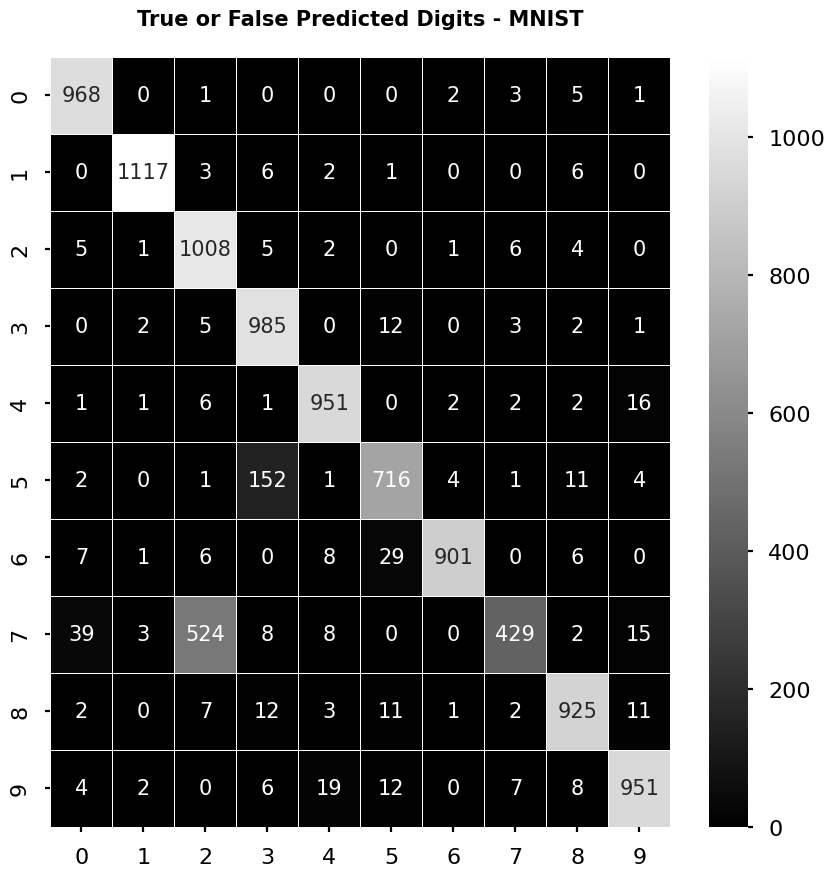

In [51]:
#Confusion matrix for Digit MNIST
con_mat = confusion_matrix(y_test_digit_eval, y_predicts)
plt.style.use('seaborn-v0_8-poster')  # Use a valid style from the available list
plt.figure(figsize=(10, 10))
sns.heatmap(con_mat, annot=True, annot_kws={"size": 15}, linewidths=0.5, fmt='d', cmap="gray")
plt.title('True or False Predicted Digits - MNIST\n', fontweight='bold', fontsize=15)
plt.show()

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test_digit_eval,y_predicts))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       980
           1       0.99      0.98      0.99      1135
           2       0.65      0.98      0.78      1032
           3       0.84      0.98      0.90      1010
           4       0.96      0.97      0.96       982
           5       0.92      0.80      0.86       892
           6       0.99      0.94      0.96       958
           7       0.95      0.42      0.58      1028
           8       0.95      0.95      0.95       974
           9       0.95      0.94      0.95      1009

    accuracy                           0.90     10000
   macro avg       0.91      0.89      0.89     10000
weighted avg       0.91      0.90      0.89     10000



In [53]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


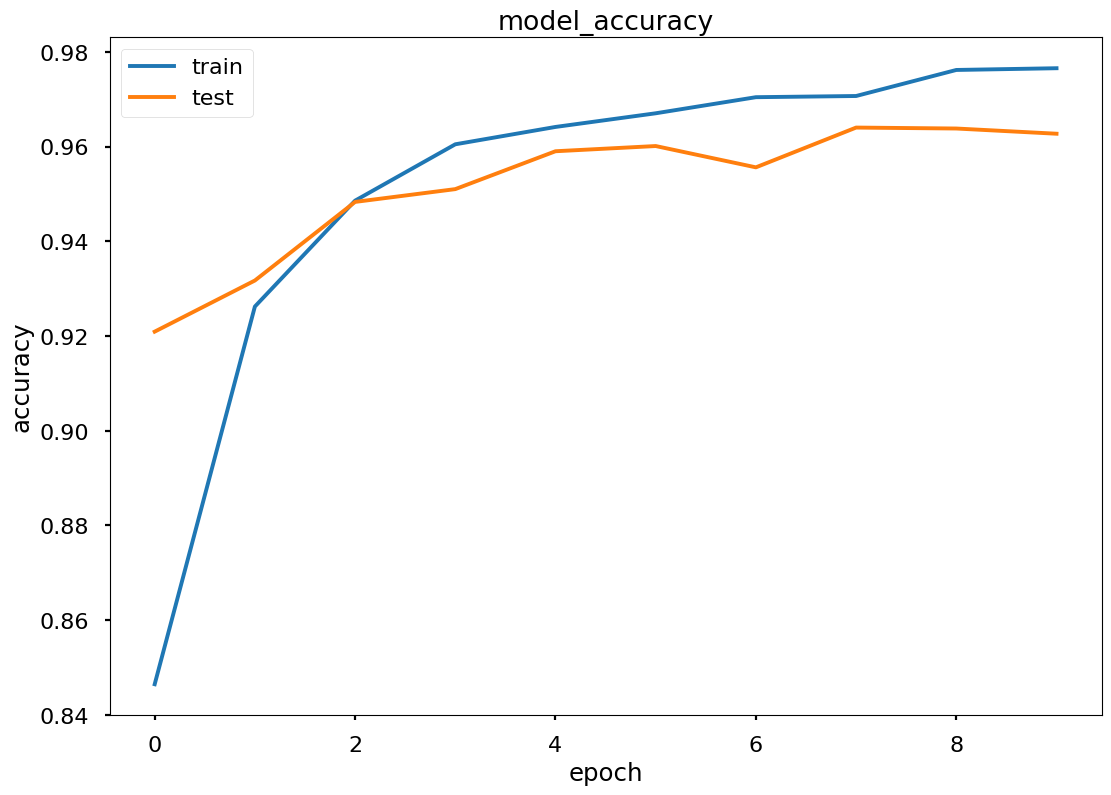

In [54]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'],  loc='best')
plt.show()

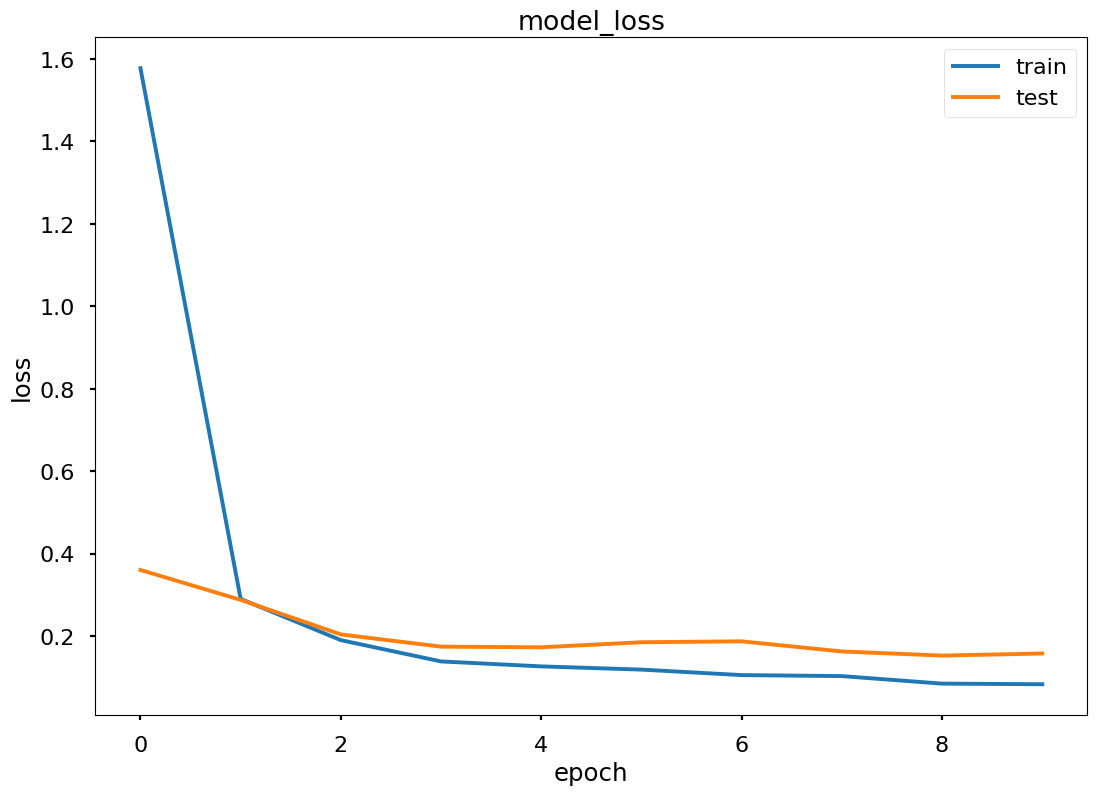

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'],  loc='best')
plt.show()

In [58]:
#tf.expand_dims(x_test_digit[0])
#cross check for single image
y_predict_single = model.predict(x_test_digit[[2]])
y_predicts_single =np.argmax(y_predict_single,axis=1)# predicted
y_test_digit_eval=np.argmax(y_test_digit,axis=1)# actual

1/1 [==============================] - 0s 31ms/step


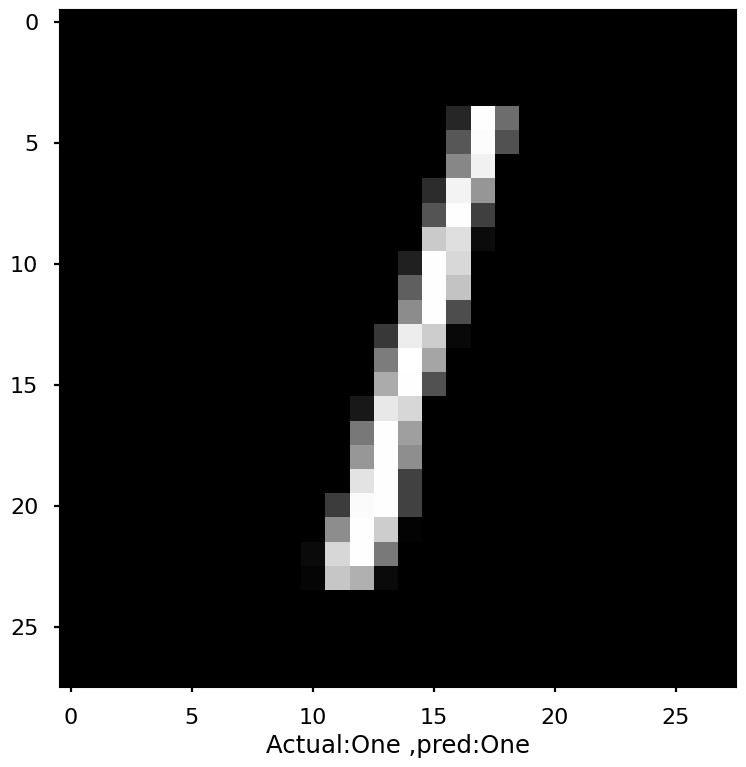

In [59]:
#Names of numbers in the dataset in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']

#visualizing the digits
#plt.figure(figsize=(10,10))
plt.imshow(x_test_digit[2].reshape(28,28), cmap='gray')
#it ll display in actual and pred in xlabel whatever after .format
#here y_test_digit[2] image is 1.so, its display 1
plt.xlabel("Actual:{} ,pred:{}".format(col_names[np.argmax(y_test_digit[2])],col_names[y_predicts_single[0]]))
plt.show()